# Neural Network Embeddings - Exercise

In [1]:
# importing packages
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tweet Emotion data

This is a dataset of 40,000 tweets labeled with one of 13 emotions:
['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
      'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger']
      
Tokenize the data and train it, with a neural network, to  predict the category of a given tweet. 

In [2]:
# reading data
text_data = pd.read_csv("./data/text_emotion.csv")

# transforming string labels to integers
text_data["sentiment"] = text_data["sentiment"].map({'empty':0, 'sadness':1, 'enthusiasm':2, 'neutral':3, 'worry':4, 'surprise':5,'love':6, 'fun':7, 'hate':8, 'happiness':9, 'boredom':10, 'relief':11, 'anger':12})

# defining data sets for train and test
train_text = text_data["content"].values[:20000]
test_text = text_data["content"].values[20000:]

# defining labels labels sets
train_text_labels = text_data["sentiment"].values[:20000]
test_text_labels = text_data["sentiment"].values[20000:]

In [3]:
# checking tweets
print(train_text[:5])

['@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =['
 'Layin n bed with a headache  ughhhh...waitin on your call...'
 'Funeral ceremony...gloomy friday...'
 'wants to hang out with friends SOON!'
 '@dannycastillo We want to trade with someone who has Houston tickets, but no one will.']


### Hyperparameters

In [4]:
# creating a list of hyperparameters for tuning the model
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = "post"
padding_type = "post"
oov_token = "<oov>"

### Tokenize the dataset

In [5]:
# defining tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_text)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_text)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_text)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

### Creating a Neural Network with embeddings

In [6]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(13, activation = 'softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                325       
Total params: 160,733
Trainable params: 160,733
Non-trainable params: 0
_________________________________________________________________


### Trainning the model

In [7]:
# training the model
history = model.fit(training_padded, train_text_labels, epochs=30, 
                    validation_data=(testing_padded, test_text_labels), verbose=2)


Train on 20000 samples, validate on 20000 samples
Epoch 1/30
20000/20000 - 2s - loss: 2.0294 - accuracy: 0.3097 - val_loss: 2.5794 - val_accuracy: 0.1121
Epoch 2/30
20000/20000 - 1s - loss: 1.9339 - accuracy: 0.3108 - val_loss: 2.5893 - val_accuracy: 0.1121
Epoch 3/30
20000/20000 - 1s - loss: 1.8977 - accuracy: 0.3255 - val_loss: 2.5018 - val_accuracy: 0.2194
Epoch 4/30
20000/20000 - 1s - loss: 1.8479 - accuracy: 0.3469 - val_loss: 2.4727 - val_accuracy: 0.2155
Epoch 5/30
20000/20000 - 1s - loss: 1.7847 - accuracy: 0.3724 - val_loss: 2.3767 - val_accuracy: 0.2348
Epoch 6/30
20000/20000 - 1s - loss: 1.7019 - accuracy: 0.4230 - val_loss: 2.3742 - val_accuracy: 0.2403
Epoch 7/30
20000/20000 - 1s - loss: 1.6209 - accuracy: 0.4572 - val_loss: 2.3341 - val_accuracy: 0.2544
Epoch 8/30
20000/20000 - 1s - loss: 1.5454 - accuracy: 0.4882 - val_loss: 2.3083 - val_accuracy: 0.2600
Epoch 9/30
20000/20000 - 1s - loss: 1.4742 - accuracy: 0.5155 - val_loss: 2.3764 - val_accuracy: 0.2549
Epoch 10/30
20

### Plotting the loss

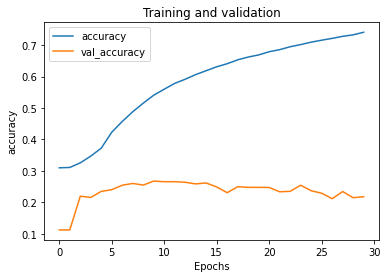

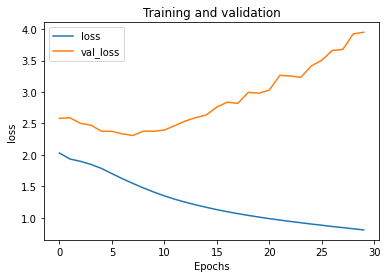

In [8]:
# creating a fucntion to plot loss and accuracy
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title('Training and validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")